# Juntando os Dados Censitários ao Dataset

In [1]:
%matplotlib inline
import geopandas as gpd

In [3]:
setor = gpd.read_file('../01.Dados/Mapas/RJ-SETOR/RJ-SETOR.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

In [7]:
setor.head()

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,400341,330455705060018,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,...,1.77,687.86,607487.37,1162.52,474104.49,468.88,439565.17,993.66,410002.85,"POLYGON ((683.349326221016 7469.17768684979, 6..."
1,400342,330455705060019,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,...,2.06,645.95,443290.44,955.47,359529.36,436.96,323403.61,844.44,280771.01,"POLYGON ((683.3094976400794 7469.213659905473,..."
2,400343,330455705060020,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,...,1.72,788.46,532814.72,1042.81,437929.47,536.64,468960.56,971.76,425985.79,"POLYGON ((683.2982913807748 7469.418253547153,..."
3,400344,330455705060021,URBANO,330455705004,Caju,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,...,2.57,635.00,587850.00,1018.65,551834.99,323.89,379860.88,1008.94,493116.72,"POLYGON ((683.4782944704702 7469.289246539755,..."
4,400347,330455705060024,URBANO,330455705003,Santo Cristo,330455705,RIO DE JANEIRO,330455705,PORTUÁRIA,3304557,...,2.49,568.02,173698.43,679.01,131792.80,378.96,177655.16,645.64,130200.18,"POLYGON ((683.8518253829462 7465.621685850603,..."


In [8]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,Dist_Trans,Dist_Praia,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,0.443193,1.143453,POINT (657.5137068691058 7453.832425203198)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,3.642787,7.478698,POINT (670.5239029320986 7461.803087641325)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,0.641470,6.240694,POINT (674.3450038415888 7469.439743130414)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,0.422370,3.404589,POINT (662.7013782087697 7457.284070512794)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,0.214605,1.369015,POINT (656.0187146395718 7453.574299351502)


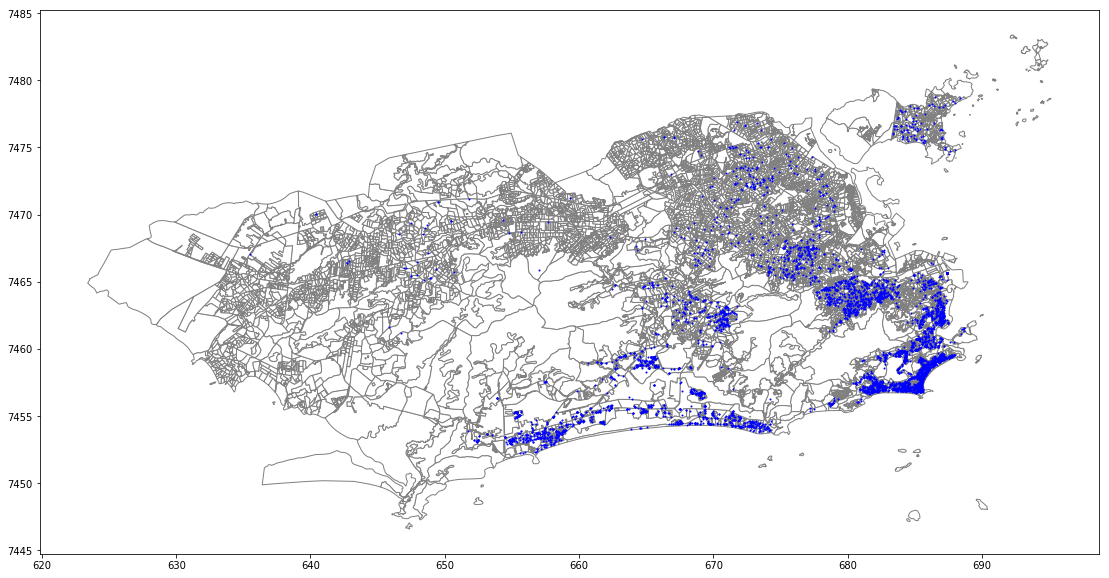

In [13]:
base = setor.plot(color = 'white', edgecolor = 'gray', figsize = (20, 10))
geo_dados.plot(ax = base, color = 'blue', markersize = 1)

In [14]:
geo_dados.shape

(4513, 17)

In [23]:
# Realizando a junção com o setor
# how -> manter o df da esquerda
# op = 'within' -> preencher os dados -> se tiver o dado, pega todos os dados do arq. setor e passa pra o geodados
geo_dados = gpd.sjoin(geo_dados, setor, how='left', op='within')

In [22]:
geo_dados.shape

(4516, 64)

In [25]:
# Criando uma seleção para identificar os duplicados
# o (til) '~' inverte a ordem. True quando não é duplicado e False quando é duplicado
~geo_dados.index.duplicated(keep = 'first')

array([ True,  True,  True, ...,  True,  True,  True])

In [26]:
geo_dados = geo_dados[~geo_dados.index.duplicated(keep = 'first')]

In [27]:
geo_dados.shape

(4513, 64)

In [28]:
geo_dados.crs

{'proj': 'utm',
 'zone': 23,
 'south': True,
 'ellps': 'GRS80',
 'units': 'km',
 'no_defs': True}

In [29]:
# visualizando o geo_dados
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,...,2.73,1.26,7337.38,1.587736e+08,7628.55,1.628856e+08,4098.24,81102256.68,5808.81,1.051217e+08
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,...,2.94,1.36,5111.83,1.231306e+07,5250.67,1.191751e+07,2779.32,10415304.75,4002.97,1.010219e+07
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,...,3.37,2.36,608.70,3.166441e+05,827.62,2.490475e+05,485.98,349437.69,800.72,3.236764e+05
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,...,3.27,1.94,7979.64,9.626894e+07,10382.30,1.003192e+08,4194.83,64288652.46,8024.48,9.228171e+07
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,...,2.87,1.67,4951.23,1.982453e+07,5078.19,1.968771e+07,3044.86,16492947.24,4180.23,1.789912e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,...,3.25,1.91,1954.20,3.700132e+06,2082.67,3.675734e+06,1074.66,5248962.41,1678.93,7.189208e+06
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,...,3.27,3.51,1192.78,1.046433e+06,1257.61,1.021509e+06,779.14,836700.66,1132.52,8.158643e+05
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,...,2.61,1.78,6380.67,3.981706e+07,7527.75,3.832342e+07,3699.27,28991808.11,6035.66,3.322869e+07
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,...,2.98,2.07,3658.92,1.315820e+07,3860.94,1.310438e+07,2177.88,8720061.58,2981.62,9.544183e+06


### Salvando 